<a href="https://colab.research.google.com/github/gourish2/CPU-scheduling/blob/master/question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

dataset=pd.read_csv('/content/drive/MyDrive/AI lab Sessional 2/101803698_ques1/dataset.csv')
print(len(dataset))
print(dataset.head())


4000
           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB
None


In [7]:
print(dataset.isnull().sum())

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64


In [8]:
print(dataset.isna().sum())

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64


So, this means dataset does not have any missing value. 

In [9]:
print(dataset.describe())

                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041523             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


In [10]:
x = dataset.iloc[:,[1,2]].values
print(x)

[[ 71.24  28.  ]
 [ 52.53  25.  ]
 [ 64.54  27.  ]
 ...
 [170.91  12.  ]
 [176.14   5.  ]
 [168.03   9.  ]]


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)  

In [12]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

In [13]:
print (y_kmeans)
print (len(y_kmeans))

[1 1 1 ... 0 0 0]
4000


In [14]:
# check how many drivers are there in 1st and 2nd cluster

print (type(y_kmeans))
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


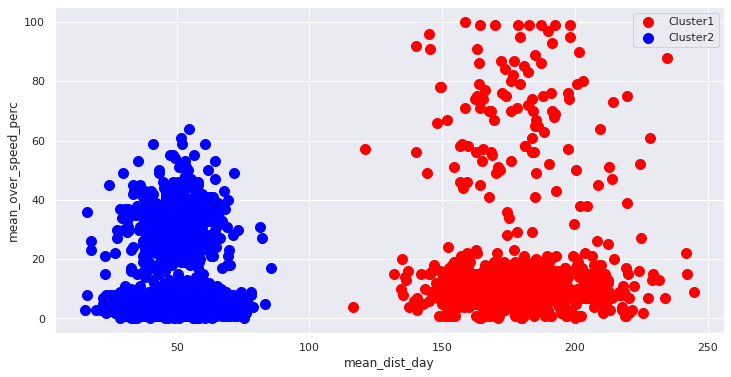

In [15]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

In [16]:
clust = pd.DataFrame(y_kmeans)
clust.columns = ['Cluster']
pd.concat([dataset,clust],axis=1)    #concat table by index

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
...,...,...,...,...
3995,3423310685,160.04,10,0
3996,3423312600,176.17,5,0
3997,3423312921,170.91,12,0
3998,3423313630,176.14,5,0
